#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Importing dataset and getting info about the dataset

In [2]:
df = pd.read_csv('prostate.csv')
df.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [3]:
df.info()

# We do not have any null value in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   lcp      97 non-null     float64
 5   gleason  97 non-null     int64  
 6   pgg45    97 non-null     int64  
 7   lpsa     97 non-null     float64
 8   Target   97 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


#### Checking correlation between the input variables

In [4]:
corr = df.corr()
corr

# There exist a little multi-collinearity between the i/p features 'gleason' & 'pgg45', since the correlation value b/w them 
# is slightly > 0.75.
# We might need to drop one of them if required.

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
lcavol,1.000000,0.280521,0.225000,0.027350,0.675310,0.432417,0.433652,0.734460,0.538845
lweight,0.280521,1.000000,0.347969,0.442264,0.164537,0.056882,0.107354,0.433319,0.155385
age,0.225000,0.347969,1.000000,0.350186,0.127668,0.268892,0.276112,0.169593,0.117658
lbph,0.027350,0.442264,0.350186,1.000000,-0.006999,0.077820,0.078460,0.179809,-0.085843
lcp,0.675310,0.164537,0.127668,-0.006999,1.000000,0.514830,0.631528,0.548813,0.673111
gleason,0.432417,0.056882,0.268892,0.077820,0.514830,1.000000,0.751905,0.368987,0.320412
pgg45,0.433652,0.107354,0.276112,0.078460,0.631528,0.751905,1.000000,0.422316,0.457648
lpsa,0.734460,0.433319,0.169593,0.179809,0.548813,0.368987,0.422316,1.000000,0.566218
Target,0.538845,0.155385,0.117658,-0.085843,0.673111,0.320412,0.457648,0.566218,1.000000


#### Separating data into training and testing dataset

In [5]:
X = df.drop('Target', axis =1)
X.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564


In [6]:
Y = df['Target']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

#### Standardizing the input features using StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.64586143, -2.01663373, -1.87210098, -1.03002898, -0.86765522,
        -1.04757113, -0.86895727, -2.53331785],
       [-1.9993129 , -0.72575947, -0.79198919, -1.03002898, -0.86765522,
        -1.04757113, -0.86895727, -2.29971238],
       [-1.58702059, -2.20015441,  1.36823439, -1.03002898, -0.86765522,
         0.34440695, -0.15615511, -2.29971238],
       [-2.17817387, -0.81219129, -0.79198919, -1.03002898, -0.86765522,
        -1.04757113, -0.86895727, -2.29971238],
       [-0.5105128 , -0.46121761, -0.25193329, -1.03002898, -0.86765522,
        -1.04757113, -0.86895727, -1.83463099],
       [-2.04670586, -0.93880639, -1.87210098, -1.03002898, -0.86765522,
        -1.04757113, -0.86895727, -1.49161747],
       [-0.5226677 , -0.3646778 ,  0.01809466,  0.35670122, -0.86765522,
        -1.04757113, -0.86895727, -1.49161747],
       [-0.56020767, -0.20984102, -0.79198919,  0.99529051, -0.86765522,
        -1.04757113, -0.86895727, -1.4141616 ],
       [-1.81362657, -0.20984102

In [8]:
# Scaling training data

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


#### Splitting the data into training and testing datasets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size = 0.7, random_state = 32)

#### Model Development -> Training & Testing the model
-- Importing model (KNN), fitting on X_train (scaled) & Y_train, and making Prediction

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)        # Taking K = 3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Model Evaluation - using Confusion matrix and Classification report

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n Classification Report')
print(classification_report(y_test, y_pred))

Confusion Matrix
[[21  3]
 [ 2  4]]

 Classification Report
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.57      0.67      0.62         6

    accuracy                           0.83        30
   macro avg       0.74      0.77      0.75        30
weighted avg       0.84      0.83      0.84        30



#### Elbow Method - To find a good value of K with the help of 'cross_val_score' using 'Error_rate'

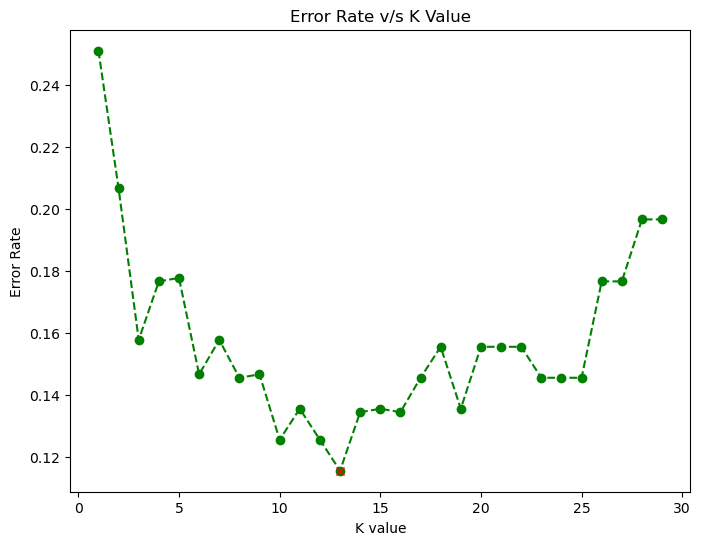

In [13]:
from sklearn.model_selection import cross_val_score

error_rate = []

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X_scaled_df, Y, cv = 10)
    error_rate.append(1 - score.mean())


plt.figure(figsize=(8,6))

plt.plot(range(1,30), error_rate, '--go')

plt.title('Error Rate v/s K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')


# Displaying the best value of K, at which accuracy rate is highest.

plt.plot(range(1,30)[error_rate.index(min(error_rate))], min(error_rate), 'rx')
plt.show()

### Getting best Value of K as 13

#### Plotting confusion matrix and classification report at K=13

In [14]:
knn = KNeighborsClassifier(n_neighbors = 13)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('With K = 13')
print('\n Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('\n Classification Report')
print(classification_report(y_test, pred))

With K = 13

 Confusion Matrix
[[22  2]
 [ 2  4]]

 Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.67      0.67      0.67         6

    accuracy                           0.87        30
   macro avg       0.79      0.79      0.79        30
weighted avg       0.87      0.87      0.87        30



### Accuracy score improved from 83% to 87%

#### Visualising the outcome -> Building "auc_curve" & calculating "roc_auc_score" at besk value of K

auc score =  0.7916666666666666


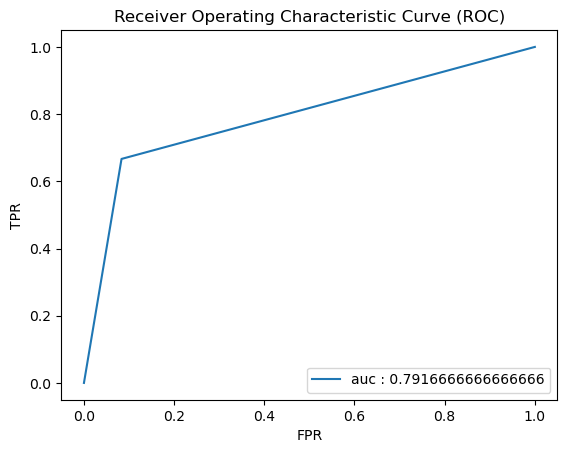

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, pred)

auc = roc_auc_score(y_test, pred)
print('auc score = ', auc)

plt.plot(fpr, tpr, label = 'auc : ' + str(auc))
plt.legend(loc=4)

plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

#### Plotting Prediction probability values on ROC Curve

auc score =  0.9583333333333333


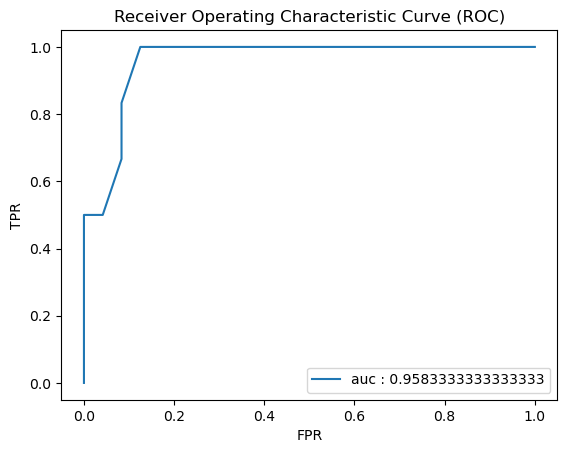

In [16]:
pred_prob = knn.predict_proba(X_test)[::,1]       # Converting probability values into 1-D Array

fpr, tpr, _ = roc_curve(y_test, pred_prob)

auc = roc_auc_score(y_test, pred_prob)
print('auc score = ', auc)

plt.plot(fpr, tpr, label = 'auc : ' + str(auc))
plt.legend(loc=4)

plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()